# **Logistic Regression on Heart Attack Dataset**

#Import Libraries and load dataset

In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# 2. Load dataset (upload your Excel file to Colab first)
# Load dataset
df = pd.read_csv("Heart Attack Data Set spreadsheet.csv")


# Inspect data and display Descriptive statistics

In [2]:
# 3. Data Preview
print(df.head())
print(df.info())
print(df.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

#

# Exploratory Data Analysis (EDA)

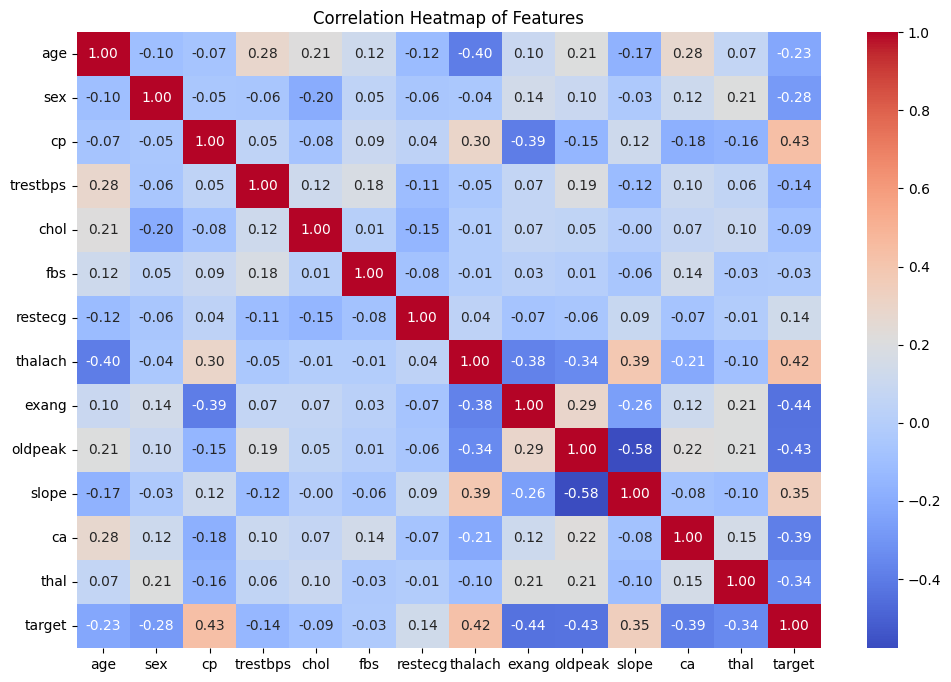

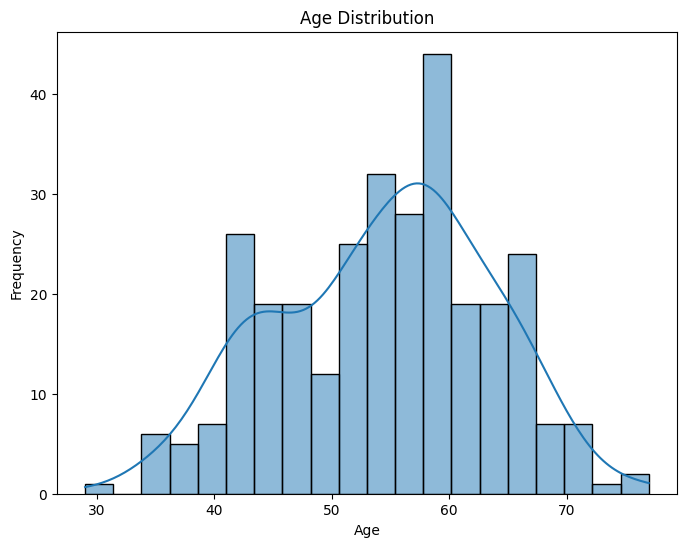

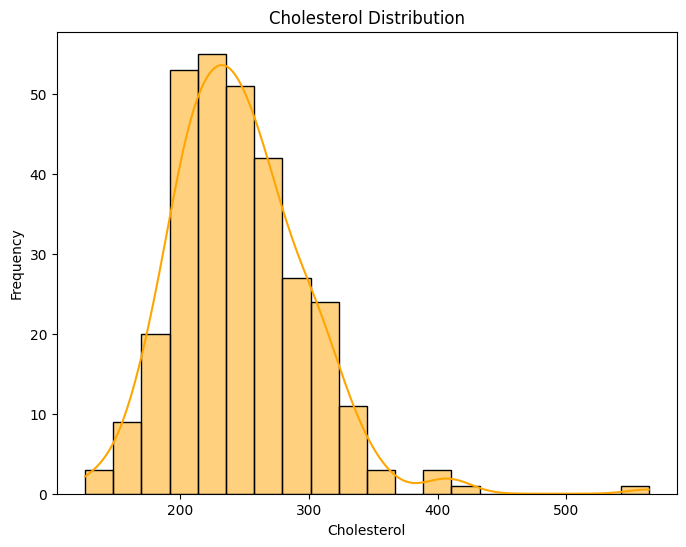

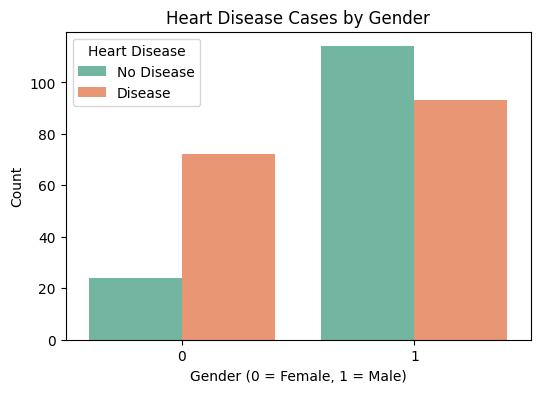

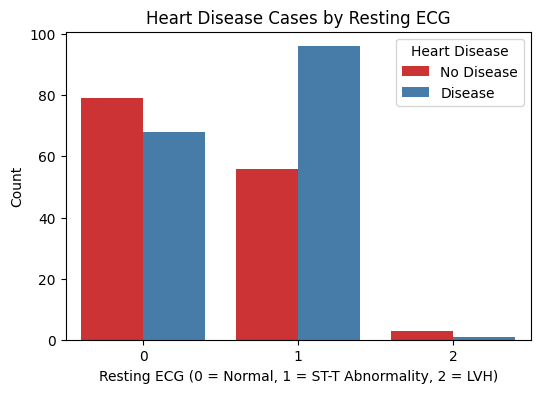

In [7]:
# 4. Exploratory Data Analysis (EDA)

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

# Age distribution
plt.figure(figsize=(8,6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Cholesterol distribution
plt.figure(figsize=(8,6))
sns.histplot(df['chol'], bins=20, kde=True, color="orange")
plt.title("Cholesterol Distribution")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.show()


# Heart disease by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="sex", hue="target", data=df, palette="Set2")
plt.title("Heart Disease Cases by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No Disease", "Disease"])
plt.show()

# Heart disease by Resting ECG
plt.figure(figsize=(6,4))
sns.countplot(x="restecg", hue="target", data=df, palette="Set1")
plt.title("Heart Disease Cases by Resting ECG")
plt.xlabel("Resting ECG (0 = Normal, 1 = ST-T Abnormality, 2 = LVH)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No Disease", "Disease"])
plt.show()




# Model Training

In [4]:
# 5. Prepare data for logistic regression
X = df.drop("target", axis=1)   # Features
y = df["target"]                # Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

#Evaluation

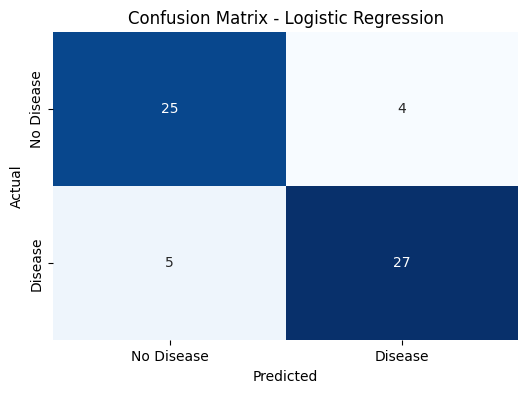


Model Evaluation Metrics:
Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1-score: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [6]:
# 7. Evaluation

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

print("\nModel Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))